In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
traffic_df = pd.read_csv('Maryland_Annual_Average_Daily_Traffic_-_Annual_Average_Daily_Traffic_(SHA_Statewide_AADT_Lines).csv', low_memory=False)

In [44]:
traffic_df.head()

,OBJECTID,LOCATION_ID,COUNTY_ID,COUNTY_DESC,MUN_SORT,MUNICIPALITY,ROADNAME,ID_PREFIX,ID_RTE_NO,MP_SUFFIX,...,AAWDT_2018_ANNO,AAWDT_ANNO,MOTORCYCLE_AADT_ANNO,CAR_AADT_ANNO,BUS_AADT_ANNO,LIGHT_TRUCK_AADT_ANNO,SINGLE_UNIT_AADT_ANNO,COMBINATION_UNIT_AADT_ANNO,TRUCK_AADT_ANNO,Shape_Length
0,1,S1998030065,3,Baltimore,0,None,Ramp 4 Fr Md 146 Nb To Ramp 5 (to Is695),RP,695,,...,"5,151","5,192",NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.853968
1,2,S2008030007,3,Baltimore,0,None,Ramp 4 Fr Is 83 Nb To Middletown Rd Eb,RP,83,,...,725,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.857691
2,3,S2011020910,2,Anne Arundel,0,None,Elm Rd,SR,9,,...,"11,011","11,432",NaN,NaN,NaN,NaN,NaN,NaN,NaN,679.124474
3,4,B0810,2,Anne Arundel,0,None,John Hanson Hwy,IS,595,,...,"98,270","98,961",260.0,"75,714",679.0,"12,222","2,813",3463.0,6276.0,9847.487806
4,5,S2000020143,2,Anne Arundel,0,None,Ramp 2 Fr Ramp 7 (fr Md100 Wb) To Md 713,RP,100,,...,"1,473","1,464",NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.682537


In [45]:
system_df = traffic_df[['F_SYSTEM', 'F_SYSTEM_DESC']]
a = system_df.F_SYSTEM.unique()
b = system_df.F_SYSTEM_DESC.unique()
systemid = pd.DataFrame(a,b)
systemid = systemid.reset_index()
systemid = systemid.rename(columns={0: 'System_ID', 'index': 'System_Name'})
systemid = systemid.sort_values(by='System_ID')
systemid = systemid.set_index('System_Name')
systemid.head(2)

,System_ID
System_Name,
Interstate,1
Principal Arterial Other Freeways and Expressways,2


In [46]:
county_df = traffic_df[['COUNTY_ID', 'COUNTY_DESC']]
a = county_df.COUNTY_ID.unique()
b = county_df.COUNTY_DESC.unique()
countyid = pd.DataFrame(a,b)
countyid = countyid.reset_index()
countyid = countyid.rename(columns={0: 'County_ID', 'index': 'County_Name'})
countyid = countyid.sort_values(by='County_ID')
countyid = countyid.set_index('County_Name')
countyid.head(2)

,County_ID
County_Name,
Allegany,1
Anne Arundel,2


In [47]:
traffic_df = traffic_df.drop(traffic_df.columns[41:], axis=1)
traffic_df = traffic_df.drop(columns=['LINK', 'ROUTEID', 'MUNICIPALITY', 'ROUTEID_RH', 'MP_SUFFIX', 'BEGIN_SECTION', 'END_SECTION', 
                                      'MUN_SORT', 'OBJECTID', 'STATION_DESC', 'ROAD_SECTION', 'ID_MP', 'RURAL_URBAN', 'MAIN_LINE',
                                      'COUNTED_FACTORED', 'STMP_SEQ', 'K_FACTOR', 'D_FACTOR','NORTH_EAST_SPLIT', 'SOUTH_WEST_SPLIT',
                                      'PEAK_HOUR_DIRECTION', 'LOCATION_ID', 'NUM_LANES', 'PEAK_HOUR_DIRECTION', 'AADT_2010', 'AADT_2011',
                                      'AADT_2012', 'AADT_2013', 'AADT_2014', 'AADT_2015'])

In [48]:
traffic_df = traffic_df.rename(columns={'AADT': 'AADT_2019'})

In [49]:
traffic_df.head()

,COUNTY_ID,COUNTY_DESC,ROADNAME,ID_PREFIX,ID_RTE_NO,F_SYSTEM,F_SYSTEM_DESC,AVMT,AADT_2016,AADT_2017,AADT_2018,AADT_2019
0,3,Baltimore,Ramp 4 Fr Md 146 Nb To Ramp 5 (to Is695),RP,695,1,Interstate,0.1093,5135.0,4980.0,4951.0,4992
1,3,Baltimore,Ramp 4 Fr Is 83 Nb To Middletown Rd Eb,RP,83,1,Interstate,0.0128,673.0,694.0,695.0,700
2,2,Anne Arundel,Elm Rd,SR,9,5,Major Collector,1.1759,9855.0,10480.0,10391.0,10392
3,2,Anne Arundel,John Hanson Hwy,IS,595,1,Interstate,166.0099,90180.0,90190.0,94490.0,95151
4,2,Anne Arundel,Ramp 2 Fr Ramp 7 (fr Md100 Wb) To Md 713,RP,100,2,Principal Arterial Other Freeways and Expressways,0.0201,1351.0,1382.0,1373.0,1374


In [50]:
traffic_df = traffic_df.sort_values(by='COUNTY_ID')

In [51]:
traffic_df.set_index(['COUNTY_ID', 'COUNTY_DESC', 'F_SYSTEM','F_SYSTEM_DESC'])

ROADNAME  \
COUNTY_ID COUNTY_DESC    F_SYSTEM F_SYSTEM_DESC                                                   
1         Allegany       3        Principal Arterial Other                         Mcmullen Hwy   
                         6        Minor Collector                                       Uhl Hwy   
                         5        Major Collector                               Country Club Rd   
                                  Major Collector                                 N Allegany St   
                         6        Minor Collector                                   Mv Smith Rd   
...                                                                                         ...   
24        Baltimore City 3        Principal Arterial Other      Ramp 6 Fr Us 40 Eb To Md 151 Sb   
                         1        Interstate                    Ramp 10 Fr Is 95 Nb To Is 95 Nb   
                         3        Principal Arterial Other  Ramp 8 Fr Md 41 Sb To Northern Pkwy   
                         1        Interstate                              Harbor Tunnel Thruway   
                         4        Minor Arterial                         Greene St (sb Couplet)   

                                                           ID_PREFIX  \
COUNTY_ID COUNTY_DESC    F_SYSTEM F_SYSTEM_DESC                        
1         Allegany       3        Principal Arterial Other        US   
                         6        Minor Collector                 MD   
                         5        Major Collector                 MD   
                                  Major Collector                 MU   
                         6        Minor Collector                 CO   
...                                                              ...   
24        Baltimore City 3        Principal Arterial Other        RP   
                         1        Interstate                      RP   
                         3        Principal Arterial Other        RP   
                         1        Interstate                      IS   
                         4        Minor Arterial                  MD   

                                                            ID_RTE_NO  \
COUNTY_ID COUNTY_DESC    F_SYSTEM F_SYSTEM_DESC                         
1         Allegany       3        Principal Arterial Other        220   
                         6        Minor Collector                  51   
                         5        Major Collector                 639   
                                  Major Collector                  60   
                         6        Minor Collector                 570   
...                                                               ...   
24        Baltimore City 3        Principal Arterial Other         40   
                         1        Interstate                       95   
                         3        Principal Arterial Other         41   
                         1        Interstate                      895   
                         4        Minor Arterial                  295   

                                                               AVMT  \
COUNTY_ID COUNTY_DESC    F_SYSTEM F_SYSTEM_DESC                       
1         Allegany       3        Principal Arterial Other   2.0482   
                         6        Minor Collector            0.9811   
                         5        Major Collector            0.0340   
                                  Major Collector            0.0390   
                         6        Minor Collector            0.0323   
...                                                             ...   
24        Baltimore City 3        Principal Arterial Other   0.0669   
                         1        Interstate                 0.9074   
                         3        Principal Arterial Other   0.2685   
                         1        Interstate                13.1945   
                         4        Minor Arterial            

In [52]:
traffic_df

,COUNTY_ID,COUNTY_DESC,ROADNAME,ID_PREFIX,ID_RTE_NO,F_SYSTEM,F_SYSTEM_DESC,AVMT,AADT_2016,AADT_2017,AADT_2018,AADT_2019
4595,1,Allegany,Mcmullen Hwy,US,220,3,Principal Arterial Other,2.0482,12080.0,12351.0,12282.0,12470
4659,1,Allegany,Uhl Hwy,MD,51,6,Minor Collector,0.9811,1220.0,1251.0,1242.0,1200
4654,1,Allegany,Country Club Rd,MD,639,5,Major Collector,0.0340,1772.0,1560.0,1551.0,1552
9315,1,Allegany,N Allegany St,MU,60,5,Major Collector,0.0390,1303.0,1334.0,1325.0,1335
475,1,Allegany,Mv Smith Rd,CO,570,6,Minor Collector,0.0323,101.0,102.0,103.0,104
...,...,...,...,...,...,...,...,...,...,...,...,...
7743,24,Baltimore City,Ramp 6 Fr Us 40 Eb To Md 151 Sb,RP,40,3,Principal Arterial Other,0.0669,NaN,NaN,3063.0,3054
4856,24,Baltimore City,Ramp 10 Fr Is 95 Nb To Is 95 Nb,RP,95,1,Interstate,0.9074,NaN,NaN,12415.0,12430
4854,24,Baltimore City,Ramp 8 Fr Md 41 Sb To Northern Pkwy,RP,41,3,Principal Arterial Other,0.2685,4821.0,4942.0,4903.0,4904
7734,24,Baltimore City,Harbor Tunnel Thruway,IS,895,1,Interstate,13.1945,84281.0,86302.0,85783.0,53954


In [53]:
traf_df = traffic_df[['COUNTY_ID','ID_RTE_NO','AADT_2016','AADT_2017','AADT_2018','AADT_2019']]

In [54]:
traf_df = pd.melt(traf_df, id_vars=['COUNTY_ID', 'ID_RTE_NO'], var_name='YEAR', value_name='AADT')

In [55]:
traf_df = traf_df.replace({'YEAR':{'AADT_2016':2016, 'AADT_2017':2017, 'AADT_2018':2018, 'AADT_2019':2019}})

In [56]:
traf_df = traf_df.rename(columns={'COUNTY_ID': 'COUNTY_NO', 'ID_RTE_NO': 'RTE_NO'})

In [57]:
traf_df = traf_df.set_index(['YEAR', 'COUNTY_NO', 'RTE_NO'])

In [58]:
traf_df

AADT
YEAR COUNTY_NO RTE_NO         
2016 1         220     12080.0
               51       1220.0
               639      1772.0
               60       1303.0
               570       101.0
...                        ...
2019 24        40       3054.0
               95      12430.0
               41       4904.0
               895     53954.0
               295      9655.0

[42660 rows x 1 columns]

In [59]:
crashdata_df = pd.read_csv('Dropped_crash_data.csv')
crashdata_df

,Unnamed: 0,YEAR,QUARTER,LIGHT_DESC,COUNTY_NO,COLLISION_TYPE_DESC,REPORT_NO,REPORT_TYPE,ACC_DATE,ACC_TIME,AGENCY_CODE,RTE_NO,MAINROAD_NAME
0,3553,2016,Q2,Daylight,24.0,Same Movement Angle,ADJ619002B,Property Damage Crash,20160517,06:00:00,BALTIMORE,147.0,HARFORD RD
1,6252,2016,Q3,Daylight,24.0,Other,ADI1140056,Property Damage Crash,20160703,15:00:00,BALTIMORE,140.0,REISTERSTOWN RD
2,9983,2017,Q4,Daylight,16.0,Other,HB04380008,Property Damage Crash,20171027,18:05:00,PGPARK,221.0,MCLAIN AVE #1
3,11681,2016,Q4,Daylight,15.0,Single Vehicle,MCP30050019,Injury Crash,20161012,11:15:00,MONTGOMERY,1274.0,WHEATON LA
4,11843,2017,Q2,Daylight,24.0,Same Direction Rear End,ADH2870003,Property Damage Crash,20170524,12:10:00,BALTIMORE,151.0,ERDMAN AVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362120,823382,2019,Q3,Daylight,8.0,Same Direction Rear End,MDTA1582000H,Property Damage Crash,20190824,11:30:00,MDTA,301.0,CRAIN HWY
362121,823383,2019,Q3,Daylight,15.0,Head On Left Turn,MCP1475002C,Injury Crash,20190922,10:00:00,MONTGOMERY,340.0,RUSSELL AVE
362122,823384,2016,Q2,Daylight,3.0,Single Vehicle,AE5643000S,Property Damage Crash,20160510,06:09:00,BACOPD,2937.0,HILLTOP RD S
362123,823385,2018,Q4,Daylight,3.0,Same Direction Left Turn,MSP6836008R,Property Damage Crash,20181016,09:59:00,MSP,695.0,BALTO BELTWAY


In [60]:
crashdata_df = crashdata_df.drop(columns=['Unnamed: 0'])

In [61]:
crashdata_df['YEAR'].value_counts()

2018    94827
2017    91911
2019    88468
2016    86919
Name: YEAR, dtype: int64

In [62]:
crashdata_df['COUNTY_NO'] = crashdata_df['COUNTY_NO'].astype(int)
crashdata_df['RTE_NO'] = crashdata_df['RTE_NO'].astype(int)

In [63]:
crashcount_df = crashdata_df.groupby(['YEAR', 'COUNTY_NO', 'RTE_NO'])['QUARTER'].count()

In [64]:
crashcount_df = pd.DataFrame(crashcount_df)

In [65]:
crashcount_df = crashcount_df.rename(columns={'QUARTER': 'CRASH_COUNT'})

In [66]:
crashcount_df = crashcount_df.reset_index()

In [67]:
crashcount_df = crashcount_df.set_index('YEAR', 'COUNTY_NO', 'RTE_NO')

C:\Users\Cole\AppData\Local\Temp\ipykernel_8588\3104338499.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  crashcount_df = crashcount_df.set_index('YEAR', 'COUNTY_NO', 'RTE_NO')


In [68]:
crashcount_df

,,COUNTY_NO,RTE_NO,CRASH_COUNT
,YEAR,,,
0,2016,1,0,1
1,2016,1,1,1
2,2016,1,9,1
3,2016,1,30,1
4,2016,1,32,1
...,...,...,...,...
38430,2019,24,6370,7
38431,2019,24,6371,3
38432,2019,24,6373,1


In [69]:
merged_df = traf_df.merge(crashcount_df, on=['YEAR','COUNTY_NO','RTE_NO'])

In [70]:
merged_df

,COUNTY_NO,RTE_NO,AADT,CRASH_COUNT
YEAR,,,,
2016,1,220,12080.0,81
2016,1,220,4221.0,81
2016,1,220,17591.0,81
2016,1,220,4842.0,81
2016,1,220,7332.0,81
...,...,...,...,...
2019,24,6157,1490.0,6
2019,24,6153,1471.0,4
2019,24,3000,3331.0,1


In [71]:
merged_df = merged_df.reset_index()

In [72]:
merged_df = merged_df.dropna()

In [73]:
merged_df

,YEAR,COUNTY_NO,RTE_NO,AADT,CRASH_COUNT
0,2016,1,220,12080.0,81
1,2016,1,220,4221.0,81
2,2016,1,220,17591.0,81
3,2016,1,220,4842.0,81
4,2016,1,220,7332.0,81
...,...,...,...,...,...
39256,2019,24,6157,1490.0,6
39257,2019,24,6153,1471.0,4
39258,2019,24,3000,3331.0,1
39259,2019,24,4400,861.0,1


In [74]:
merged2_df = merged_df.groupby(['YEAR', 'COUNTY_NO', 'RTE_NO', 'CRASH_COUNT'], as_index=False)['AADT'].mean()

In [75]:
merged2_df['CRASH_OVER_TRAFFIC'] = (merged2_df['CRASH_COUNT'] / merged2_df['AADT'])

In [76]:
merged2_df

,YEAR,COUNTY_NO,RTE_NO,CRASH_COUNT,AADT,CRASH_OVER_TRAFFIC
0,2016,1,35,10,4577.0,0.002185
1,2016,1,36,35,6497.0,0.005387
2,2016,1,40,58,9839.0,0.005895
3,2016,1,47,1,2190.0,0.000457
4,2016,1,49,1,4150.0,0.000241
...,...,...,...,...,...,...
12280,2019,24,6366,22,29622.0,0.000743
12281,2019,24,6370,7,770.0,0.009091
12282,2019,24,6371,3,861.0,0.003484
12283,2019,24,6373,1,4670.0,0.000214


In [77]:
merged2_df = merged2_df.set_index(['YEAR', 'COUNTY_NO', 'RTE_NO'])

In [94]:
merged2_df

CRASH_COUNT     AADT  CRASH_OVER_TRAFFIC
YEAR COUNTY_NO RTE_NO                                          
2016 1         35               10   4577.0            0.002185
               36               35   6497.0            0.005387
               40               58   9839.0            0.005895
               47                1   2190.0            0.000457
               49                1   4150.0            0.000241
...                            ...      ...                 ...
2019 24        6366             22  29622.0            0.000743
               6370              7    770.0            0.009091
               6371              3    861.0            0.003484
               6373              1   4670.0            0.000214
               6377              8   1490.0            0.005369

[12285 rows x 3 columns]

In [79]:
#merged2_df.to_csv('FinalData.csv')

In [80]:
visualdata_df = merged2_df.reset_index()

In [81]:
visualdata_df.sort_values(by='CRASH_OVER_TRAFFIC' , ascending=False, inplace=True)

In [85]:
visdata2016 = visualdata_df.loc[visualdata_df['YEAR'] == 2016]

In [97]:
visdata2016.groupby(['COUNTY_NO'])

In [98]:
visdata2016

,YEAR,COUNTY_NO,RTE_NO,CRASH_COUNT,AADT,CRASH_OVER_TRAFFIC
1889,2016,16,95,1954,26450.250000,0.073875
430,2016,3,695,1850,25512.459350,0.072514
2908,2016,24,4165,24,525.000000,0.045714
2388,2016,22,13,410,9133.212766,0.044891
2284,2016,21,70,334,8936.284211,0.037376
...,...,...,...,...,...,...
309,2016,2,5455,1,14122.000000,0.000071
2335,2016,21,706,1,14782.000000,0.000068
1832,2016,15,7220,2,31188.000000,0.000064
2686,2016,24,1491,1,18774.000000,0.000053


<AxesSubplot: xlabel='RTE_NO', ylabel='CRASH_OVER_TRAFFIC'>

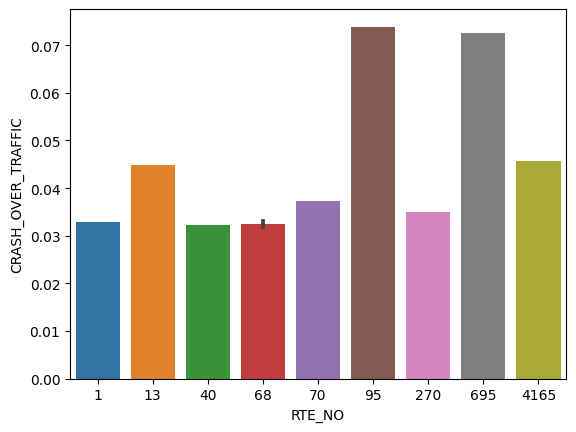

In [101]:
sns.barplot(visdata2016.iloc[:10], x='RTE_NO', y='CRASH_OVER_TRAFFIC')